# Assignment 1 (shortened)

This notebook contains three exercises from the exercise sets we covered prior to moving the teaching online. It will count as one of the two assignments you need to submit to qualify for the exam. **The deadline** for handing in this assignment is **April 3.** You hand in by pushing your solutions to your folder in the exercise repo.

## Problems from exercise set 2
> **Ex. 2.1.1**: The performance of a random forest classifier is highly sensitive to hyper parameters. Therefore, you should be intimately familiar with what the most important ones do. For each point below, explain what the hyper parameter pertaining to `sklearn.ensemble.RandomForestClassifier` controls, and how setting it either too low or too high (or True/False) might hurt model performance:
1. `n_estimators`
2. `max_depth`
3. `max_features`
4. `bootstrap`

# Solution
1. `n_estimators` controls how many trees are estimated, i.e. how big the forest is. Setting it too low will hurt predictive performance as it increases the variance. Setting it to high does not hurt predictive performance but does hurt computational performance
2. `max_depth` increases how many successive splits can be performed,, i.e how deep each tree in the random forest is. Setting it to low increases the bias of each tree and therefore the overall forest. Setting it to high increases makes tree more flexible and increases the variance, also hurting performance.

3. `max_features` controls how many feauteres are considered in each split. This is usally set by heuristics. 
4. `bootstrap` Cotrols whether the samples used for estimating each tree is bootstrapped. Choosing true improves predictive performance, and also allows for OOB prediction.

> **Ex. 2.1.2**: For `n_estimators > 1`how should one set the hyper-parameters `max_features` and `bootstrap` so that all the trees in the ensemble end up identical?

# Solution
Setting `max_features` = $p$ and `bootstrap` = False will result in all trees being equal

## Problems from exercise set 3

> **Ex. 3.1.2**: Reproduce the figure from the slides that compares PCA, LDA, t-SNE and UMAP as applied to the digits dataset.
1. Do it for the digits dataset (same as in slides)
2. Do it also for the wine dataset. What problems do you observe if you don't standardize the wine dataset? Why is this not a problem with the digits data?
3. Comment on the differences you observe as well as the applicability (and necessity thereof) of different methods for different data.
>
> *Hint: You can use [this class](https://github.com/ulfaslak/ulf_pytools/blob/7f4f1eb7e2d721851c8dacb20904478b19090f2a/ulf.py#L451) for making coloring easier. It lets you create a function that takes a category as input and returns an associated color. Read the docstring for usage example.*

In [10]:
# Solution
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.datasets import load_digits
from umap import UMAP

# Get wine data
data_wine = load_wine()
X_wine = data_wine['data']
y_wine = data_wine['target']

# Get digits data
data_digits = load_digits()
X_digits = data_digits['data']
y_digits = data_digits['target']


from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def fit_plot(X, y, est_type, ax):
     
    if est_type == LDA:
        est = est_type()
        X_trans = est.fit_transform(X,y)
    else:
        est = est_type()
        X_trans = est.fit_transform(X)
    
    d1, d2 = X_trans[:,0], X_trans[:,1]
    
    ax.scatter(d1, d2, c = y, cmap = 'cividis')
    ax.set_title(est_type.__name__)

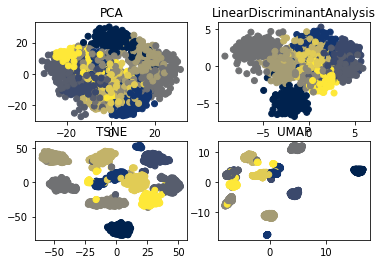

In [11]:
fig, ax = plt.subplots(2,2)
fit_plot(X_digits, y_digits, PCA, ax[0,0])
fit_plot(X_digits, y_digits, LDA, ax[0,1])
fit_plot(X_digits, y_digits, TSNE, ax[1,0])
fit_plot(X_digits, y_digits, UMAP, ax[1,1])

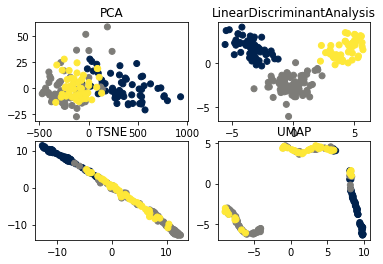

In [12]:
fig, ax = plt.subplots(2,2)
fit_plot(X_wine, y_wine, PCA, ax[0,0])
fit_plot(X_wine, y_wine, LDA, ax[0,1])
fit_plot(X_wine, y_wine, TSNE, ax[1,0])
fit_plot(X_wine, y_wine, UMAP, ax[1,1])

## Problems from exercise set 4

In this problem we will try to implement and understand some of the ideas used in [Athey, Imbens (2015)](https://www.pnas.org/content/pnas/113/27/7353.full.pdf) to develop _Honest Inference_ in desicion tree models. The paper begins by covering honesty in a setting of population averages, and for estimating conditional means; so you will need to look towards the second half of the paper to get an impression of it's use for treatment-effect estimation.

> **Ex. 4.2.1:** What does it mean that a tree is _honest?_ In particular what are the implications in terms of 
> * The intuition for why honesty is required in order to get good local treatment effect estimates?
> * The practical implementation of the DT algorithm?

If Honesty was not used the data used for splitting would affect the estimates of local treatment effects.
Honesty is achieved by diving the sample. The first part is used fror growing the tree, i.e. domain splitting, and the second part is then used the hoenstly estimate the local effects in each split.